In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [3]:
file1 = 'raw_data/city_data.csv'
file2 = 'raw_data/ride_data.csv'

In [4]:
city_df = pd.read_csv(file1)
ride_df = pd.read_csv(file2)

In [5]:
city_df=city_df.sort_values('city')
city_df.head(10)
city_df = city_df.reset_index()

In [6]:
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789


In [7]:
city_df['average_fare'] = ride_df.groupby('city')['fare'].mean().to_frame().reset_index()['fare']

In [8]:
city_df['total_rides']=ride_df['city'].value_counts().to_frame().reset_index().sort_values('index').reset_index()['city']


In [9]:
driver_count_per = city_df.groupby('city')['driver_count'].sum().to_frame().reset_index()

In [10]:
city_type = city_df.groupby('city')['type'].sum().to_frame().reset_index()

In [11]:
city_df.head()


,index,city,driver_count,type,average_fare,total_rides
0,61,Amandaburgh,12,Urban,24.641667,18
1,9,Barajasview,26,Urban,25.332273,22
2,90,Barronchester,11,Suburban,36.422500,16
3,88,Bethanyland,22,Suburban,32.956111,18
4,115,Bradshawfurt,7,Rural,40.064000,10


In [12]:
urban_type = city_df.loc[city_df.type == 'Urban']
suburban_type = city_df.loc[city_df.type == 'Suburban']
rural_type = city_df.loc[city_df.type == 'Rural']

In [13]:
suburban_type.head()

,index,city,driver_count,type,average_fare,total_rides
2,90,Barronchester,11,Suburban,36.422500,16
3,88,Bethanyland,22,Suburban,32.956111,18
5,91,Brandonfort,10,Suburban,35.437368,19
8,69,Colemanland,23,Suburban,30.894545,22
9,97,Davidfurt,23,Suburban,31.995882,17


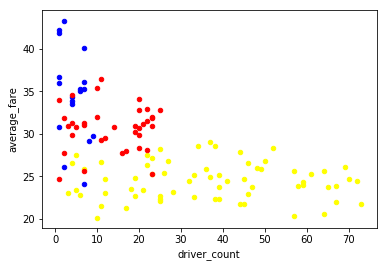

In [33]:
ax = urban_type.plot(kind='scatter', x = 'driver_count',y='average_fare',c=(1,1,0))
rural_type.plot(kind='scatter', x = 'driver_count',y='average_fare',c=(0,0,1), ax=ax)
suburban_type.plot(kind='scatter', x = 'driver_count',y='average_fare',c=(1,0,0), ax=ax)
#(Gold, Light Sky Blue, and Light Coral)

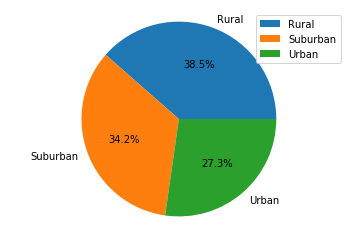

In [23]:
plt.pie(type_percents, labels = type_keys, autopct ='%1.1f%%')
plt.legend(type_keys, loc="best")
plt.axis('equal')
plt.show()

In [24]:
#* % of Total Rides by City Type
total_ride_keys = city_df.groupby(['type'])['total_rides'].mean().keys()
total_ride_percents = city_df.groupby(['type'])['total_rides'].mean().tolist()

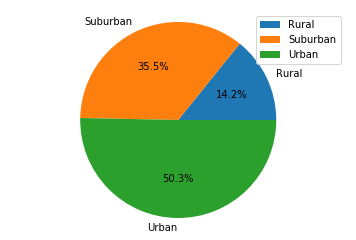

In [25]:
plt.pie(total_ride_percents, labels = total_ride_keys, autopct ='%1.1f%%')
plt.legend(type_keys, loc="best")
plt.axis('equal')
plt.show()

In [26]:
#* % of Total Drivers by City Type
total_driver_keys = city_df.groupby(['type'])['driver_count'].mean().keys()
total_driver_percents = city_df.groupby(['type'])['driver_count'].mean().tolist()

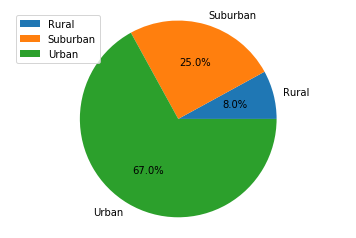

In [287]:
plt.pie(total_driver_percents, labels = total_driver_keys, autopct ='%1.1f%%')
plt.legend(type_keys, loc="best")
plt.axis('equal')
plt.show()